In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data
df=pd.read_csv("Loan_data.csv")

In [3]:
# Displaying first 5 records
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Getting the shape of the dataset
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Checking the number of missing values in the columns.
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Checking the number of unique values.
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

##### From the above results, we can see that there are some missing values in few columns. So we will deal with them below.

## EDA

In [9]:
# Drop the 'Loan_ID' column as it has all unique values.
df=df.drop('Loan_ID',axis=1)

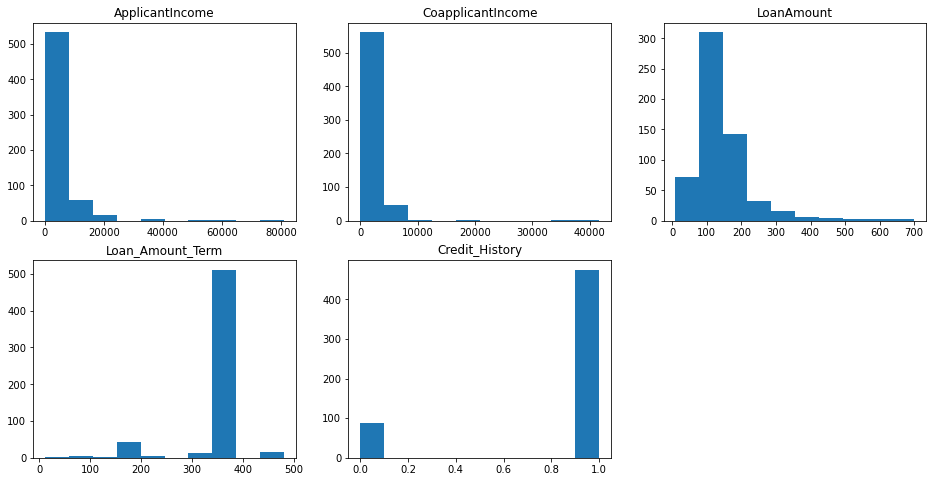

In [10]:
# Plot of numerical features
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(16,8))
for i,feature in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    df[feature].hist(grid=False)
    plt.title(feature)

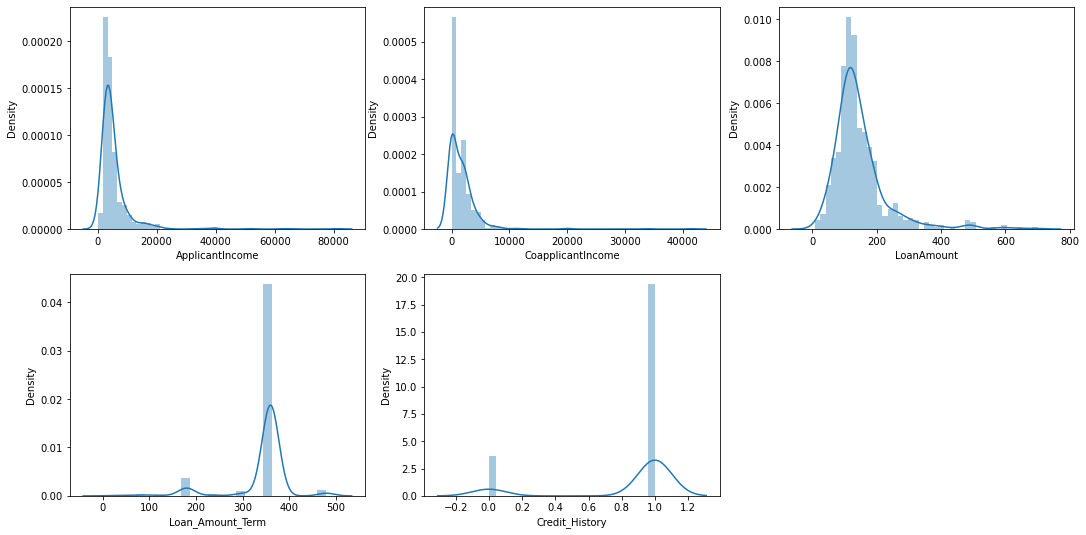

In [11]:
plt.figure(figsize=(18,9))
for i,feature in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.distplot(df[feature])

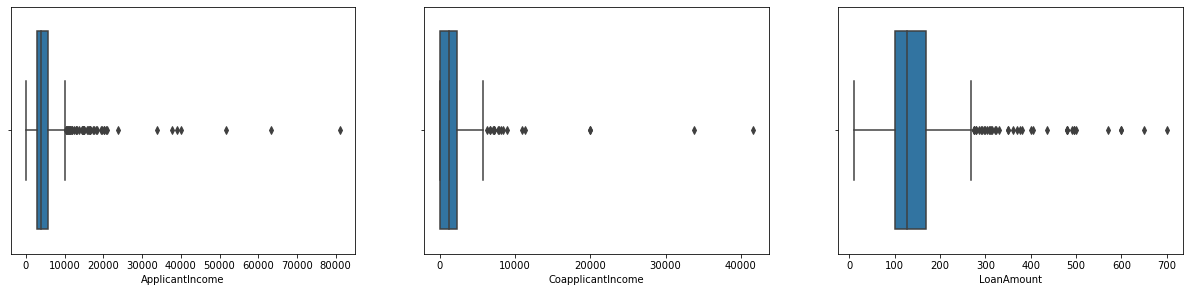

In [12]:
#Plotting the box plot of the numerical features to identify outliers.

num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount']
plt.figure(figsize=(21,10))
for i,feature in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[feature])

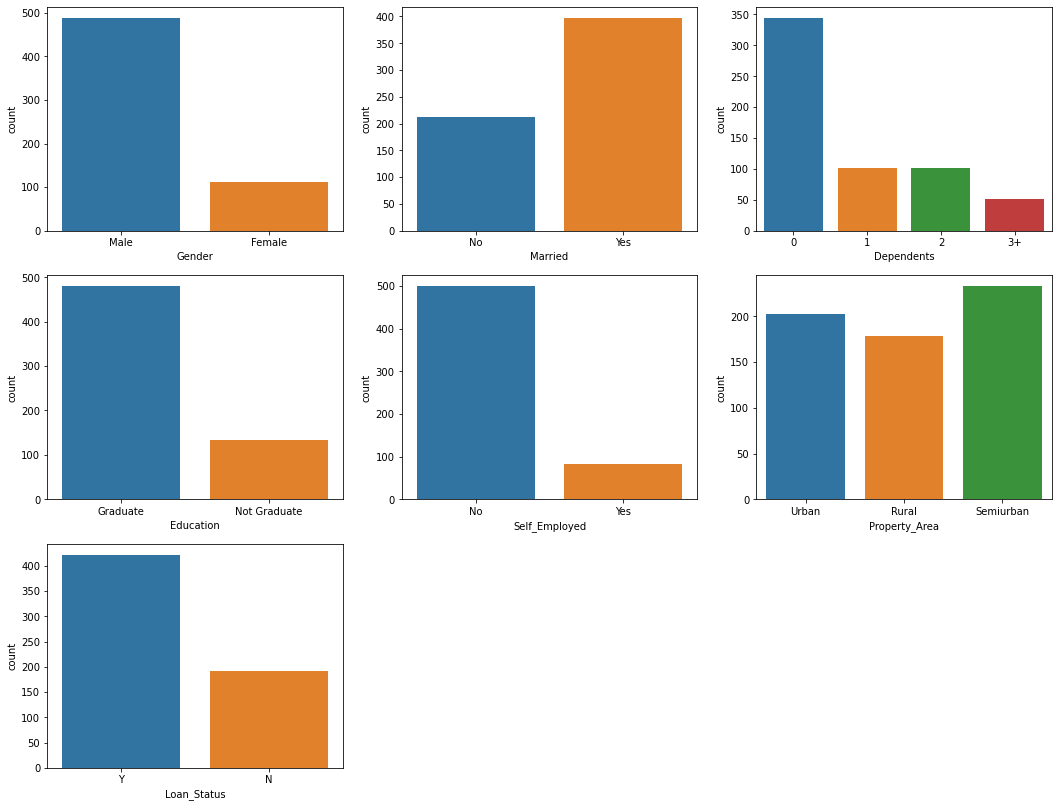

In [13]:
# Plot of categorical features
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
plt.figure(figsize=(18,14))
for i,feature in enumerate(cat_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(df[feature])

<AxesSubplot:title={'center':'Loan Status'}>

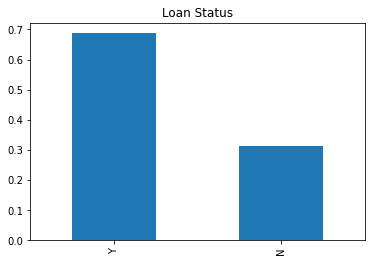

In [14]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan Status')

##### After plotting the graphs, we can point out some things:
1. The continuous features like ApplicantIncome, CoapplicantIncome, LoanAmount are skewed to the right. They also contains outliers in the upper side which is obvious.
2. For the categorical features, all the independent features except Property_area has the max datapoints of one value. So max features are one sided.
3. For the dependent feature 'Loan_Status', it contains 2 unique values with approx 7:3 ratio of Yes and No respectively. So it is one sided to Yes value.

In [15]:
# Function for filling the missing values
def missing_value_cat(col):
    df[col]=df[col].fillna(df[col].mode()[0])

In [16]:
columns=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History']
for i in columns:
    missing_value_cat(i)

In [17]:
df['LoanAmount'].mean(),df['LoanAmount'].median()

(146.41216216216216, 128.0)

In [18]:
# Filling the missing values of LoanAmount feature with its median
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [19]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
# function for changing the skewed distribution to normal distribution
def ndist(df,col):
    df[col]=np.log(df[col])

In [21]:
cols=['ApplicantIncome','LoanAmount']
for col in cols:
    ndist(df,col)

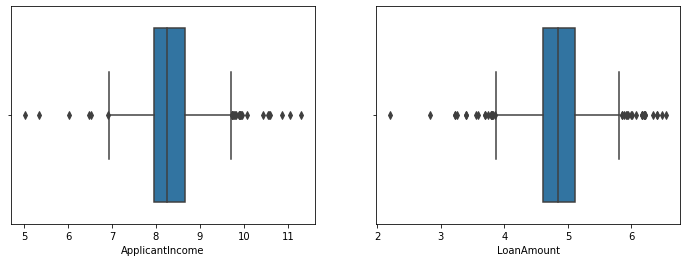

In [22]:
plt.figure(figsize=(12,4))
for i,feature in enumerate(cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[feature])

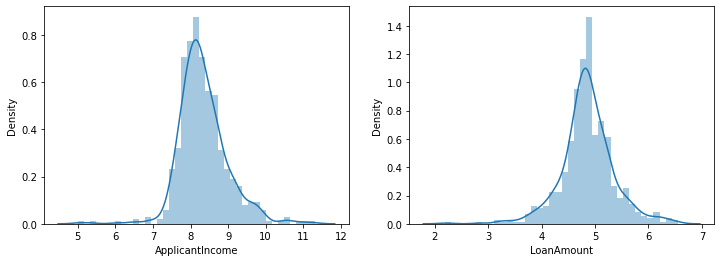

In [23]:
plt.figure(figsize=(12,4))
for i,feature in enumerate(cols):
    plt.subplot(1,2,i+1)
    sns.distplot(df[feature])

In [24]:
df['Loan_Status'].replace({'N':0,'Y':1},inplace=True)

<AxesSubplot:>

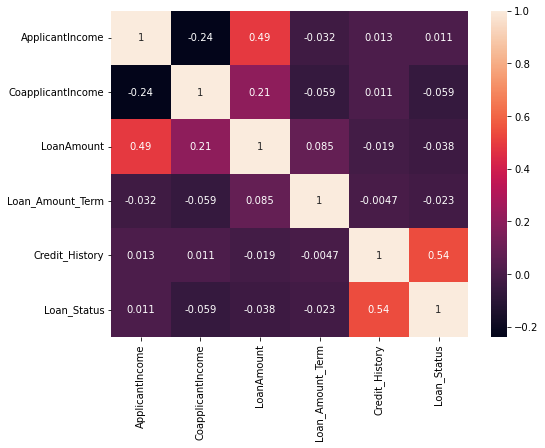

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [26]:
# Separating the independent and the dependent feature
X=df.drop('Loan_Status',1)
y=df['Loan_Status']

In [27]:
X=pd.get_dummies(data=X,drop_first=True)

In [28]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674026,0.0,4.852030,360.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430109,1508.0,4.852030,360.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006368,0.0,4.189655,360.0,1.0,1,1,0,0,0,0,1,0,1
3,7.856707,2358.0,4.787492,360.0,1.0,1,1,0,0,0,1,0,0,1
4,8.699515,0.0,4.948760,360.0,1.0,1,0,0,0,0,0,0,0,1


## Model Building

In [29]:
## Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.shape)

(478, 14)
(136, 14)
478
(136,)


In [30]:
## From EDA,We found that the dependent feature has max datapoints of one value.So Logistic regression will not work nicely
## on this dataset and also accuracy score will not be a good performance metrics to use here. We can use F1 score here.
## I am running Logistic Regression model just for checking how it will work here but will not consider its results.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7720588235294118

In [32]:
f1_score(y_test,y_pred)

0.8442211055276382

In [33]:
confusion_matrix(y_test,y_pred)

array([[21, 29],
       [ 2, 84]], dtype=int64)

In [34]:
# Running other models.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
def model_run(x):
    print(x)
    model=x.fit(X_train,y_train)
    y_prediction=model.predict(X_test)
    print('F1 score')
    print(f1_score(y_test,y_prediction))
    c=confusion_matrix(y_test,y_prediction)
    print('confusion matrix: {}'.format(c))

In [36]:
model_run(DecisionTreeClassifier())

DecisionTreeClassifier()
F1 score
0.802197802197802
confusion matrix: [[27 23]
 [13 73]]


In [37]:
model_run(RandomForestClassifier())

RandomForestClassifier()
F1 score
0.8469387755102041
confusion matrix: [[23 27]
 [ 3 83]]


In [38]:
model_run(KNeighborsClassifier())

KNeighborsClassifier()
F1 score
0.7692307692307692
confusion matrix: [[ 8 42]
 [ 6 80]]


In [39]:
model_run(GaussianNB())

GaussianNB()
F1 score
0.8442211055276382
confusion matrix: [[21 29]
 [ 2 84]]
